In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("C:/Users/kdipu/OneDrive/Desktop/MLP/archive (2)/german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.shape

(1000, 11)

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [10]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [11]:
df['Saving accounts'].fillna(value = 'mode', axis = 0, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [13]:
df['Checking account'].fillna(value = 'mode', axis = 0, inplace = True)

In [14]:
duplicate_rows_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicate_rows_df.shape)

Number of duplicate rows: (0, 10)


In [15]:
num_atr=['Age' , 'Credit amount' , 'Duration']

cat_atr=['Sex' , 'Job' , 'Housing' , 'Saving accounts' , 'Checking account' , 'Purpose']

In [16]:
df.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [18]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,mode,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,mode,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


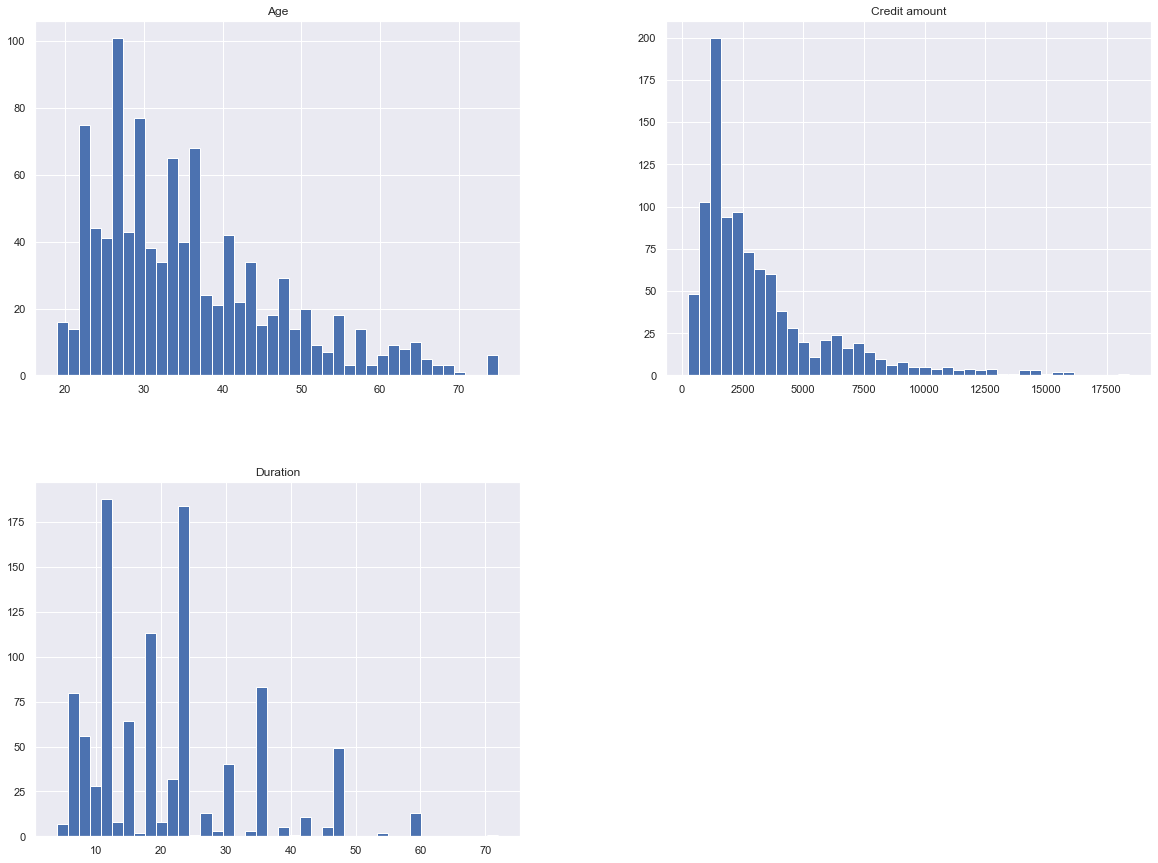

In [17]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

In [19]:
# KNN Classification
from sklearn.model_selection import train_test_split
X= df.drop(['Risk'], axis=1)
y= df['Risk']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
X_train[cat_atr].head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
731,1,1,2,0,0,5
716,1,2,1,1,1,5
640,0,0,1,0,0,3
804,0,0,2,1,2,1
737,1,1,1,2,0,1


In [23]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.25959752, -0.44363756,  0.25913751],
       [ 0.3716242 , -0.05891106,  0.76208462],
       [-0.74447487, -0.88024919, -0.2438096 ],
       ...,
       [ 0.88674684,  0.12356931, -0.49528316],
       [-0.48691355, -0.50152301,  0.25913751],
       [ 0.11406287, -0.40375307, -0.2438096 ]])

In [24]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(700, 9)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [26]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(300, 9)

In [27]:
y_pred = knn.predict(Xtr1)

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 26,  60],
       [ 27, 187]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.71

In [30]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.49056604, 0.75708502]),
 array([0.30232558, 0.87383178]),
 array([0.37410072, 0.81127983]),
 array([ 86, 214], dtype=int64))

In [31]:
# Decision Tree Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
X= df.drop(['Risk'], axis=1)
y= df['Risk']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
X_train[cat_atr].head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
731,1,1,2,0,0,5
716,1,2,1,1,1,5
640,0,0,1,0,0,3
804,0,0,2,1,2,1
737,1,1,1,2,0,1


In [36]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.25959752, -0.44363756,  0.25913751],
       [ 0.3716242 , -0.05891106,  0.76208462],
       [-0.74447487, -0.88024919, -0.2438096 ],
       ...,
       [ 0.88674684,  0.12356931, -0.49528316],
       [-0.48691355, -0.50152301,  0.25913751],
       [ 0.11406287, -0.40375307, -0.2438096 ]])

In [37]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(700, 9)

In [38]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[-1.17271041e-01,  1.25873482e+00, -4.77494135e-01],
       [ 7.24834839e-01,  4.48424907e+00,  1.22494675e+00],
       [-1.17271041e-01, -2.06301127e-01, -7.20699977e-01],
       [ 6.31267519e-01,  3.97217765e-02,  1.22494675e+00],
       [-1.05294424e+00,  4.54773516e-01,  2.19777012e+00],
       [ 7.24834839e-01, -7.13029523e-01, -7.20699977e-01],
       [ 6.98635989e-02,  7.04377538e-01, -2.34288294e-01],
       [-8.65809601e-01, -8.69524441e-01, -1.04497443e+00],
       [-3.04405681e-01, -9.43295500e-01, -7.20699977e-01],
       [-6.78674961e-01, -4.51965918e-01, -7.20699977e-01],
       [-1.17271041e-01, -5.34689776e-01,  1.22494675e+00],
       [-7.72242281e-01,  2.89784182e-02,  4.95329230e-01],
       [-5.85107641e-01,  1.37189820e+00,  1.71135844e+00],
       [ 7.24834839e-01, -6.71846650e-01, -4.77494135e-01],
       [ 7.24834839e-01,  1.45318961e+00,  2.52123389e-01],
       [ 1.09910412e+00, -4.83837881e-01, -2.34288294e-01],
       [-8.65809601e-01, -3.18748276e-01

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(300, 9)

In [39]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [40]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [41]:
y_pred = dt.predict(Xtr1)

In [42]:
np.sum((y_test == y_pred))/y_test.size

0.6433333333333333

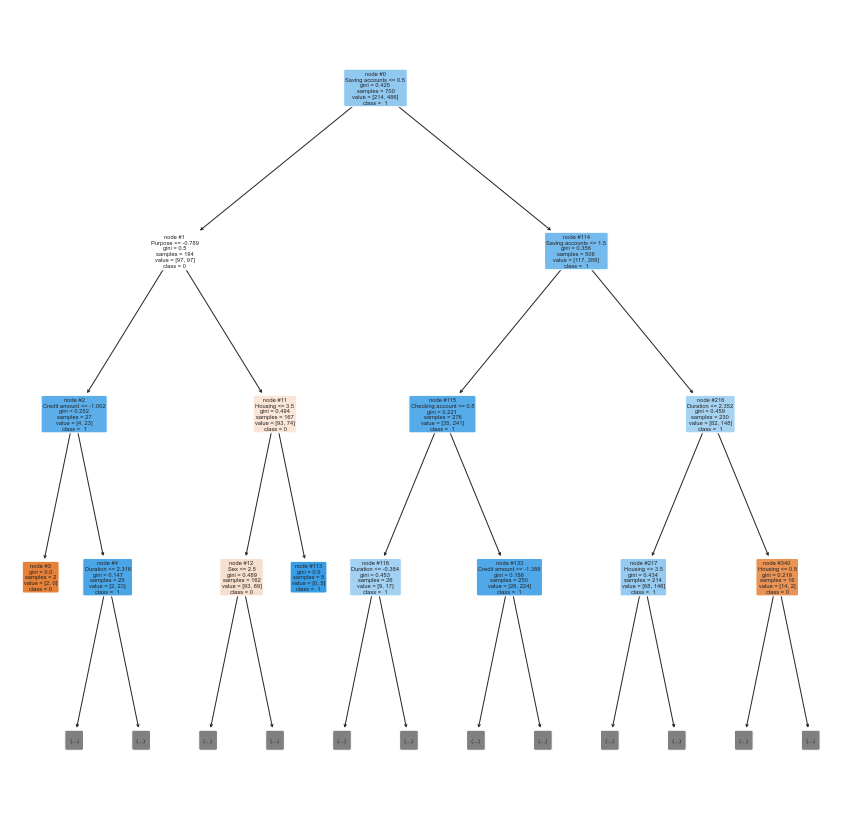

In [43]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
            class_names = ['0',' 1']
            )

_=plt.show()

In [44]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [45]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7433333333333333


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[ 37,  49],
       [ 28, 186]], dtype=int64)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.57      0.43      0.49        86
        good       0.79      0.87      0.83       214

    accuracy                           0.74       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300



In [48]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
df.feature_names = df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose']]
df.target_names = df['Risk']

C:\Users\kdipu\AppData\Local\Temp/ipykernel_11756/1128296188.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
C:\Users\kdipu\AppData\Local\Temp/ipykernel_11756/1128296188.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df['Risk']


In [50]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

6    0.251575
0    0.196741
7    0.148496
5    0.119072
8    0.089772
4    0.065463
2    0.051706
3    0.043192
1    0.033983
dtype: float64

In [51]:
list(zip(df.columns, feature_imp))

[('Age', 0.25157460876007043),
 ('Sex', 0.19674131144285376),
 ('Job', 0.14849554787867525),
 ('Housing', 0.11907202016960072),
 ('Saving accounts', 0.08977237430169058),
 ('Checking account', 0.06546285287190161),
 ('Credit amount', 0.051705624764324394),
 ('Duration', 0.043192186253645605),
 ('Purpose', 0.03398347355723771)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


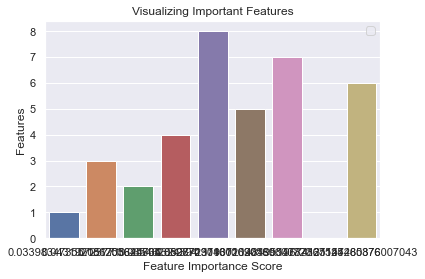

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.74


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.56      0.42      0.48        86
        good       0.79      0.87      0.83       214

    accuracy                           0.74       300
   macro avg       0.68      0.64      0.65       300
weighted avg       0.72      0.74      0.73       300

